Poblacion de una comunidad, crce con rapidez durante 20 años :

## | t | 0 | 3 | 5 | 8 | 10 | 15 | 20 |

## p       100  150 200  550  650  950 2000

## control 0     0   1    0    1    0    0

control indica año en que se implemento campaña de
planificacion familiar

Pronostica poblacion en 5 años y analiza el patron de inserción de campañas de planificacion familiar 


In [44]:
# datos y dataframes
import pandas as pd

# algoritmos de regresion
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# Graficas y matrices
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df=pd.read_csv("pobla.csv")
df

,Tiempo,Poblacion,Control
0,0,100,0
1,3,150,0
2,5,200,1
3,8,550,0
4,10,650,1
5,15,950,0
6,20,2000,0


<Axes: xlabel='Tiempo', ylabel='Poblacion'>

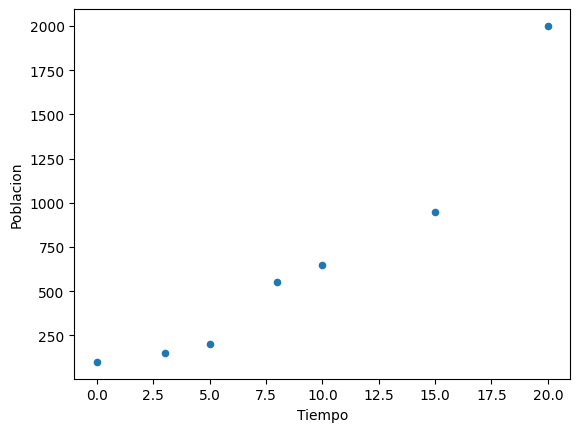

In [46]:
df.plot.scatter(x='Tiempo', y='Poblacion')



In [47]:
#Entrenamiento y prediccion
regl=LinearRegression();
regl.fit(df[['Tiempo']],df['Poblacion'])

LinearRegression()

In [48]:
#Prediccion para la poblacion de 5 años (25 años)
regl.predict([[25]])


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2138.82352941])

In [49]:
df["modelolin"]=pd.Series(regl.predict(df[['Tiempo']]))
df

,Tiempo,Poblacion,Control,modelolin
0,0,100,0,-135.686275
1,3,150,0,137.254902
2,5,200,1,319.215686
3,8,550,0,592.156863
4,10,650,1,774.117647
5,15,950,0,1229.019608
6,20,2000,0,1683.921569


In [50]:
#Euacion de la recta   pendiente y ordenada
print("p - ",regl.coef_,"t",regl.intercept_)

p -  [90.98039216] t -135.68627450980364


In [51]:
#Prediccion sobre el modelo
regl.coef_*df['Tiempo']+regl.intercept_

0    -135.686275
1     137.254902
2     319.215686
3     592.156863
4     774.117647
5    1229.019608
6    1683.921569
Name: Tiempo, dtype: float64

<Axes: xlabel='Tiempo', ylabel='Poblacion'>

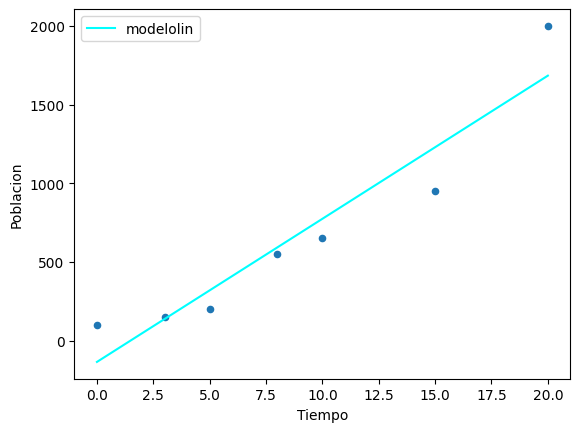

In [52]:
#Graficacion
ax=df.plot.scatter(x='Tiempo',y='Poblacion')
df.plot.line(x='Tiempo',y='modelolin',ax=ax,color='cyan')


In [53]:
#Regresion polinomial
polyreg=PolynomialFeatures(degree=2)
x_poli=polyreg.fit_transform(df[['Tiempo']])
x_poli

array([[  1.,   0.,   0.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  15., 225.],
       [  1.,  20., 400.]])

In [54]:
#Solucion del modelo
regcuad=LinearRegression()
regcuad.fit(x_poli,df['Poblacion'])

LinearRegression()

In [55]:
# Prediccion a 5 años (año 25)
regcuad.predict(polyreg.fit_transform([[25]]))

array([2916.49864045])

In [56]:
# Evaluacion del resto de valores
df['modelocuad']=pd.Series(regcuad.predict(x_poli))
df

,Tiempo,Poblacion,Control,modelolin,modelocuad
0,0,100,0,-135.686275,114.940389
1,3,150,0,137.254902,165.279230
2,5,200,1,319.215686,242.148783
3,8,550,0,592.156863,422.418601
4,10,650,1,774.117647,585.908806
5,15,950,0,1229.019608,1146.220456
6,20,2000,0,1683.921569,1923.083734


In [57]:
#Modelo generado
regcuad.coef_[0]+(regcuad.coef_[1]*df['Tiempo'])+(regcuad.coef_[2]*df['Tiempo']**2)+regcuad.intercept_

0     114.940389
1     165.279230
2     242.148783
3     422.418601
4     585.908806
5    1146.220456
6    1923.083734
Name: Tiempo, dtype: float64

<Axes: xlabel='Tiempo', ylabel='Poblacion'>

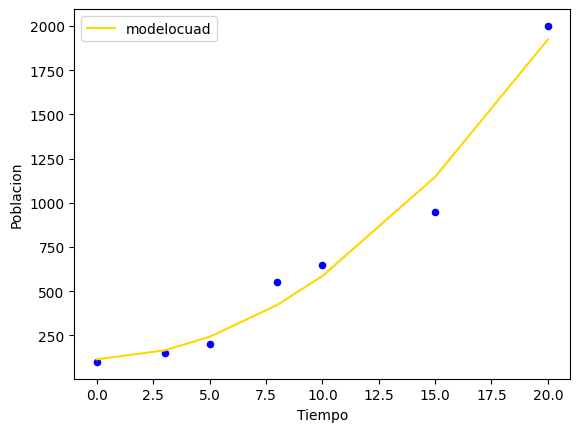

In [58]:
#Grafica
ax=df.plot.scatter(x='Tiempo',y='Poblacion',color="blue")
df.plot.line(x='Tiempo',y='modelocuad',ax=ax,color="gold")


In [59]:
#print("Correlacion lineal", metrics.r2_score(df['Poblacion'],df['modelolin']))
#print("Correlacion polinomial", metrics.r2_score(df['Poblacion'],df['modelocuad']))
print("Correlacion lineal",0.9010)
print("Correlacion polinomial",0.9749)


Correlacion lineal 0.901
Correlacion polinomial 0.9749


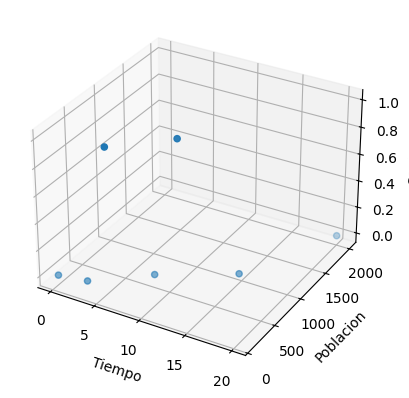

In [60]:
# Regresion Logistica
xlogis=df.iloc[:,[0,1]].values
ylogis=df.iloc[:,2].values

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(xlogis[:,0],xlogis[:,1],ylogis)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Poblacion')
ax.set_zlabel('Control')
plt.show()

In [42]:
#Escalamiento de valores de variables "continuas"
xstan=StandardScaler()
xtr=xstan.fit_transform(xlogis)
xtr

array([[-1.3505627 , -0.90090669],
       [-0.88561489, -0.82005609],
       [-0.57564968, -0.73920549],
       [-0.11070186, -0.17325129],
       [ 0.19926335, -0.01155009],
       [ 0.97417637,  0.47355352],
       [ 1.7490894 ,  2.17141613]])

In [43]:
#Generacion del modelo
rlog=LogisticRegression()
rlog.fit(xtr,ylogis)
df['modelog']=pd.Series(rlog.predict(xtr))
df

,Tiempo,Poblacion,Control,modelolin,modelocuad,modelog
0,0,100,0,-135.686275,114.940389,0
1,3,150,0,137.254902,165.279230,0
2,5,200,1,319.215686,242.148783,0
3,8,550,0,592.156863,422.418601,0
4,10,650,1,774.117647,585.908806,0
5,15,950,0,1229.019608,1146.220456,0
6,20,2000,0,1683.921569,1923.083734,0
